# Integration with Pandas and Seaborn

## Integración con Pandas y Seaborn

Una de las grandes ventajas de **Matplotlib** es su interoperabilidad con otras librerías clave del ecosistema de Python para ciencia de datos. **Pandas**, con sus estructuras de datos Series y DataFrames, facilita enormemente la preparación y el manejo de datos, y Matplotlib se convierte en la herramienta subyacente para visualizarlos de manera eficiente. Además, librerías como **Seaborn** construyen sobre Matplotlib para ofrecer gráficos estadísticos más complejos y estéticamente atractivos con menos código, demostrando el poder del ecosistema.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Direct Visualization with Pandas

Pandas integra Matplotlib directamente, permitiéndote generar gráficos rápidamente desde tus Series y DataFrames usando el método `.plot()`. Esto simplifica drástificaramente el proceso de visualización de datos tabulares, ya que Pandas maneja gran parte del mapeo de datos a los ejes del gráfico.

- `df.plot(kind='...', **kwargs)`: Método de un DataFrame para generar un gráfico.
  - `kind`: Especifica el tipo de gráfico (ej. `'line'`, `'bar'`, `'hist'`, `'box'`, `'scatter'`).
  - `x`, `y`: Nombres de las columnas a usar para los ejes.
  - `figsize`: Tamaño de la figura.
  - `title`: Título del gráfico.
  - `grid`: Mostrar o no la rejilla.
  - `legend`: Mostrar o no la leyenda.
  - Otros `kwargs` de Matplotlib: Muchas propiedades de Matplotlib se pueden pasar directamente aquí.
- `series.plot(kind='...', **kwargs)`: Similar para un objeto Series.

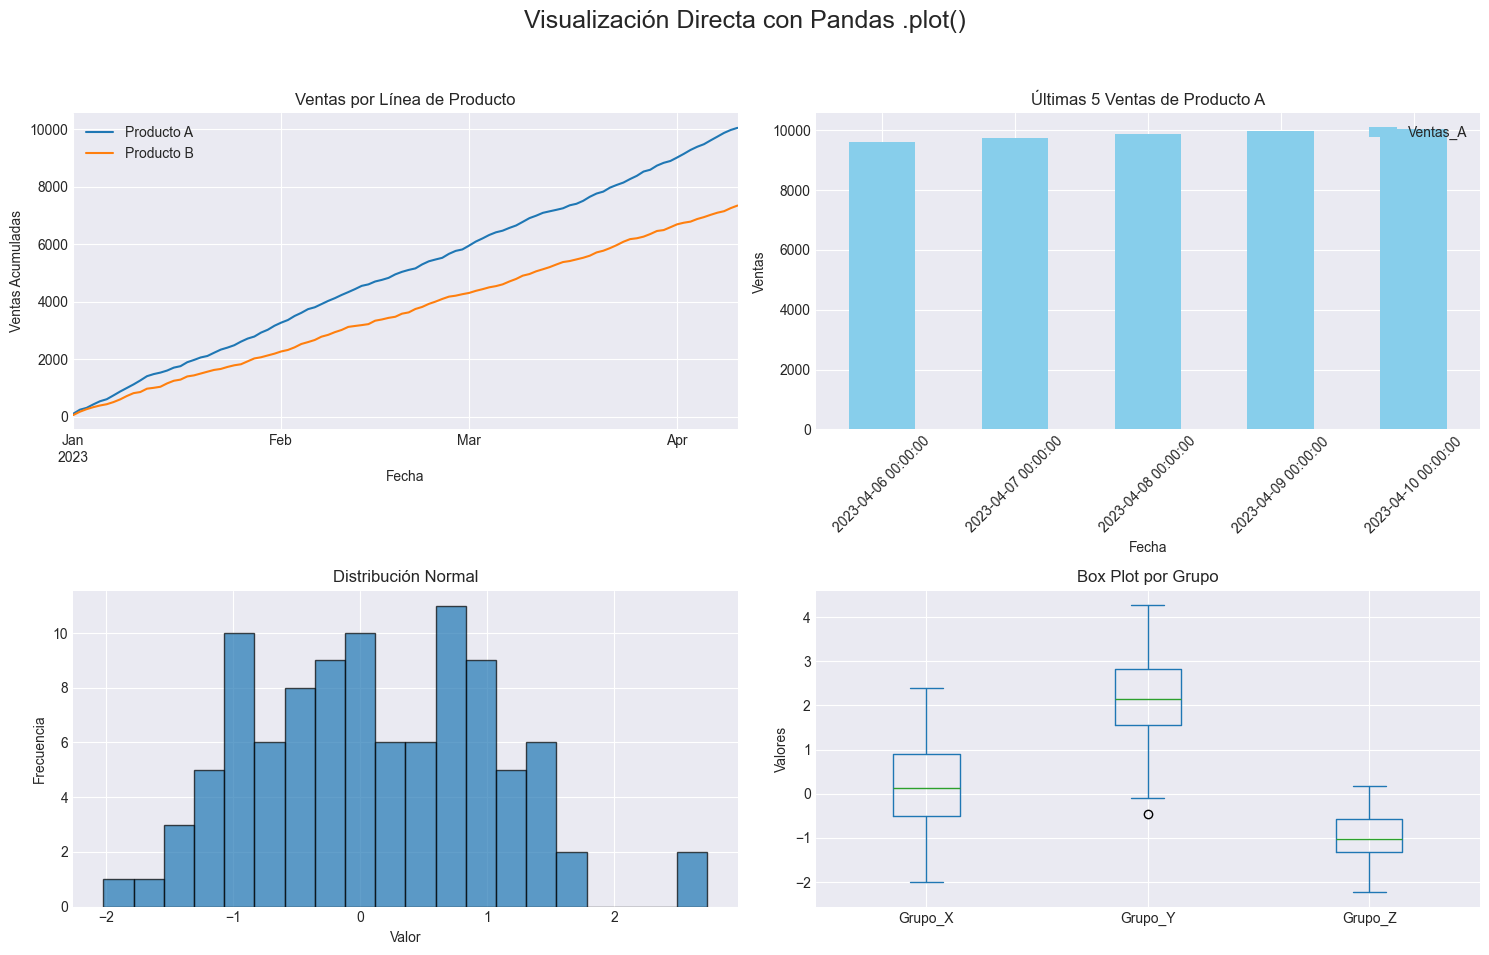

In [2]:
#Crear un DataFrame de ejemplo
np.random.seed(42) #Para reproducibilidad
data = {
    'Fecha': pd.to_datetime(pd.date_range('2023-01-01', periods=100)),
    'Ventas_A': np.random.randint(50, 150, 100).cumsum(),
    'Ventas_B': np.random.randint(30, 120, 100).cumsum()
}
df = pd.DataFrame(data)
df = df.set_index('Fecha')

#Crear un Series de ejemplo
s = pd.Series(np.random.normal(0, 1, 100), name='Distribucion_Normal')

plt.style.use('seaborn-v0_8-darkgrid') #Un estilo agradable para los ejemplos

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

#Ejemplo 1: Gráfico de Líneas desde DataFrame
#Usando el índice del DataFrame como eje X
df.plot(y=['Ventas_A', 'Ventas_B'], ax=axes[0, 0], title='Ventas por Línea de Producto',
        xlabel='Fecha', ylabel='Ventas Acumuladas', grid=True)
axes[0, 0].legend(['Producto A', 'Producto B']) #Personalizar leyenda

#Ejemplo 2: Gráfico de Barras desde DataFrame
#Seleccionar las últimas 5 fechas para un gráfico de barras
df.tail(5).plot(kind='bar', y='Ventas_A', ax=axes[0, 1], title='Últimas 5 Ventas de Producto A',
                 rot=45, color='skyblue')
axes[0, 1].set_ylabel('Ventas')

#Ejemplo 3: Histograma desde Series
s.plot(kind='hist', bins=20, ax=axes[1, 0], title='Distribución Normal',
       edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Valor')
axes[1, 0].set_ylabel('Frecuencia')

#Ejemplo 4: Box Plot desde DataFrame
#Crear un DataFrame con categorías para box plot
df_box = pd.DataFrame({
    'Grupo_X': np.random.normal(0, 1, 100),
    'Grupo_Y': np.random.normal(2, 1, 100),
    'Grupo_Z': np.random.normal(-1, 0.5, 100)
})
df_box.plot(kind='box', ax=axes[1, 1], title='Box Plot por Grupo')
axes[1, 1].set_ylabel('Valores')

plt.suptitle('Visualización Directa con Pandas .plot()', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Integration with Seaborn

Seaborn es una librería de visualización de datos de Python basada en Matplotlib. Se especializa en la creación de gráficos estadísticos atractivos e informativos. Si bien Seaborn tiene su propia API de alto nivel, utiliza Matplotlib por debajo para renderizar los gráficos. Esto significa que puedes combinar la facilidad de uso de Seaborn para gráficos complejos con el control granular de Matplotlib para la personalización.

- **Estilos y Paletas de Colores:** Seaborn mejora automáticamente los estilos de Matplotlib. Al importar Seaborn, suele aplicar su estilo por defecto, que es más moderno.
- **Retorno de Objetos `Axes`:** Muchas funciones de Seaborn devuelven un objeto Axes de Matplotlib, lo que te permite usar métodos ax. para personalización adicional (títulos, etiquetas, límites, etc.).
- **Facet Grids:** Seaborn excels en la creación de múltiples gráficos basados en categorías (Facet Grids), que son esencialmente colecciones organizadas de subplots de Matplotlib.

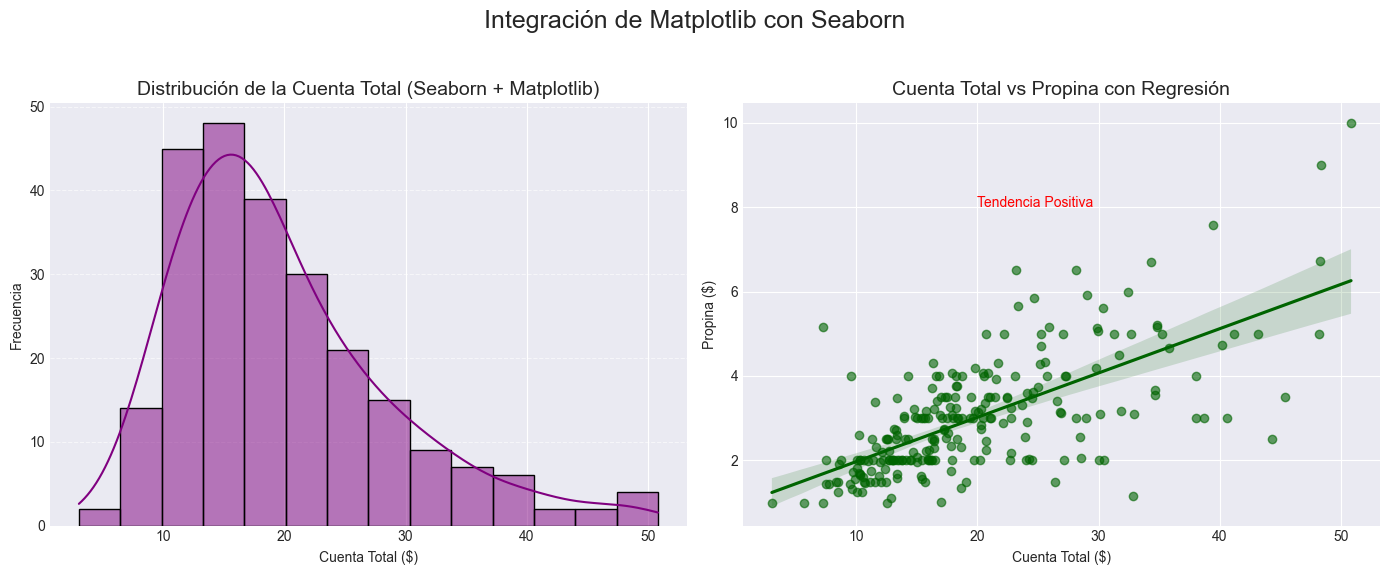

In [3]:
#Cargar un dataset de ejemplo de Seaborn
tips = sns.load_dataset("tips")

plt.figure(figsize=(14, 6))

#Ejemplo 1: Histograma mejorado con Seaborn y personalización Matplotlib
#sns.histplot devuelve un objeto Axes (ax)
ax1 = plt.subplot(1, 2, 1) # Crear un subplot de Matplotlib primero
sns.histplot(data=tips, x="total_bill", kde=True, ax=ax1, color='purple')
ax1.set_title('Distribución de la Cuenta Total (Seaborn + Matplotlib)', fontsize=14)
ax1.set_xlabel('Cuenta Total ($)')
ax1.set_ylabel('Frecuencia')
ax1.grid(axis='y', linestyle='--', alpha=0.6) # Añadir rejilla con Matplotlib

#Ejemplo 2: Scatter plot con regresión y personalización Matplotlib
#sns.regplot también devuelve un objeto Axes
ax2 = plt.subplot(1, 2, 2)
sns.regplot(data=tips, x="total_bill", y="tip", ax=ax2, color='darkgreen', scatter_kws={'alpha':0.6})
ax2.set_title('Cuenta Total vs Propina con Regresión', fontsize=14)
ax2.set_xlabel('Cuenta Total ($)')
ax2.set_ylabel('Propina ($)')
ax2.text(20, 8, 'Tendencia Positiva', fontsize=10, color='red') # Anotación con Matplotlib

plt.suptitle('Integración de Matplotlib con Seaborn', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()